# ANIKET PATIL 

## Prediction of student scores: with linear regression in Python

# 1. Importing libraries and checking out the data
Here we shall import the dataset for our project, and import libraries required to perform data manipulation. To prepare data for building a model 

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Check out the Data

In [491]:
StudentScores = pd.read_csv('./Data/student_scores.csv') # imports dataset

# set use_inf_as_na option 
pd.set_option('mode.use_inf_as_na', True)
# Convert inf values to NaN
StudentScores.replace([np.inf, -np.inf], np.nan, inplace=True)


StudentScores.head()


/tmp/ipykernel_56251/3918320787.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [492]:
StudentScores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [493]:
StudentScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [494]:
StudentScores.columns

Index(['Hours', 'Scores'], dtype='object')

# 2. EDA 
Exploring dataset to find insights. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


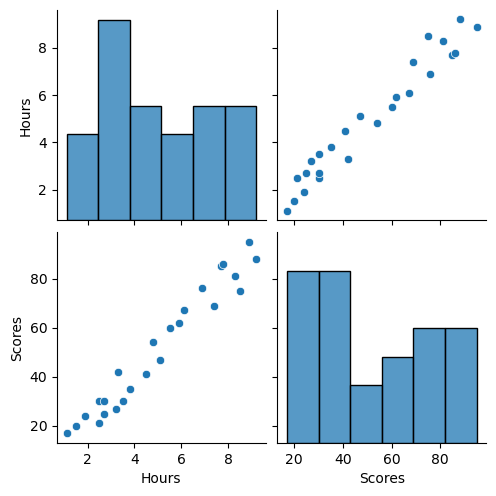

In [496]:
sns.pairplot(StudentScores)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hours', ylabel='Count'>

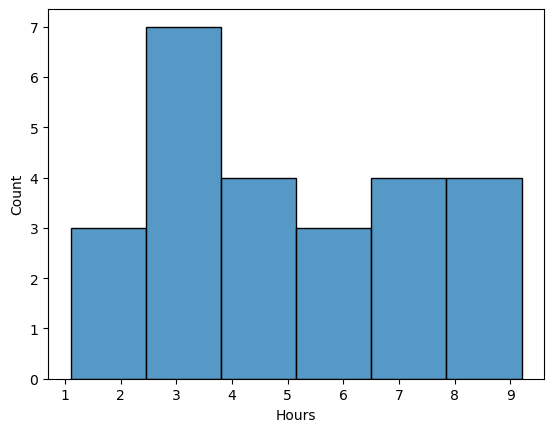

In [497]:
sns.histplot(StudentScores['Hours'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Scores', ylabel='Count'>

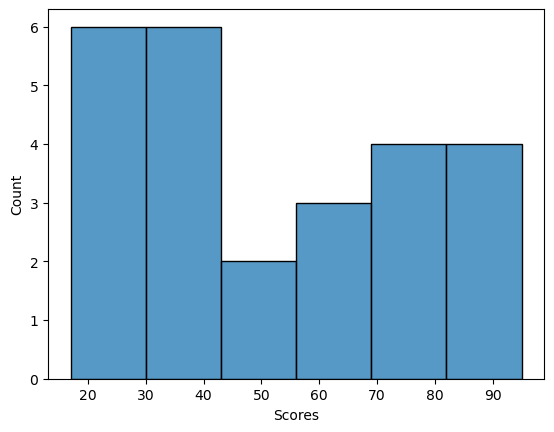

In [498]:
sns.histplot(StudentScores['Scores'])

<Axes: >

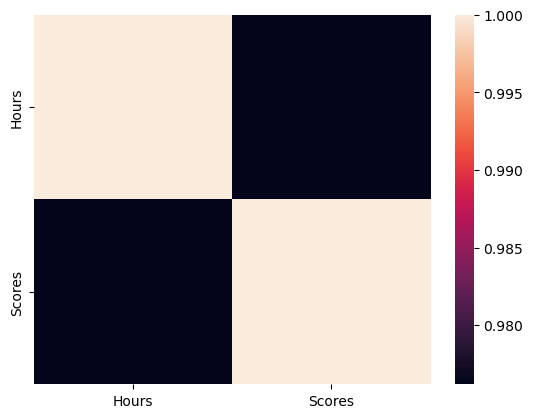

In [499]:
sns.heatmap(StudentScores.corr())

# 3. Training the model 
Since our feature is 'Hours' studied, based on that we are trying to predict 'Scores' which is the target variable. <br>
We split data as following : <br>
X = 'Hours' <br>
y = 'Scores' <br>

In [501]:
X = StudentScores.iloc[ : , 0].values
y = StudentScores.iloc[ : , -1].values


# Since the data is with single feature and only one target variable we need to convert 1D to 2D to fit data in training
X = np.array(X)
X = X.reshape(-1, 1)

y = np.array(y)
y = y.reshape(-1, 1)


### Train Test split of dataset 

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 102)

### Creating and training the model 

In [505]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### Getting the intercepts of model and coefficient 

In [507]:
print(f"Linear Model intercept:{lm.intercept_}")
print(f"Linear Model Coefficient : {lm.coef_}")

Linear Model intercept:[3.45668078]
Linear Model Coefficient : [[9.63842633]]


### Plotting the regression line 

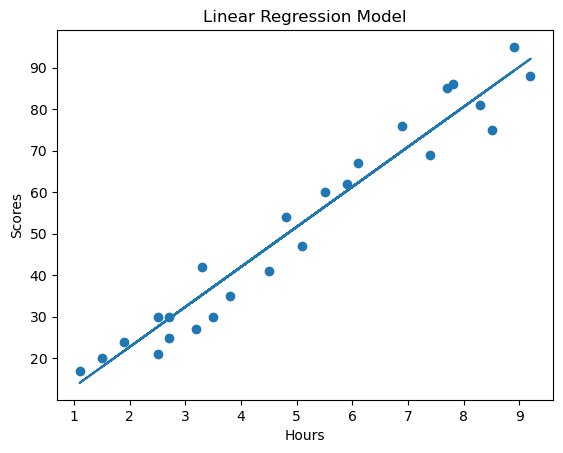

In [509]:
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Linear Regression Model")
plt.plot(X, line);
plt.show()


## Predicting the data 

In [511]:
print(X_test)
y_pred = lm.predict(X_test)
y_pred.shape
y_test.shape

[[5.1]
 [4.5]
 [1.5]
 [7.7]
 [3.8]]


(5, 1)

### Compare: Actual Vs. Predicted 

In [513]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result_df


,Actual,Predicted
0,47,52.612655
1,41,46.829599
2,20,17.914320
3,85,77.672564
4,35,40.082701


### Using scatterplot to visualise the predictions 

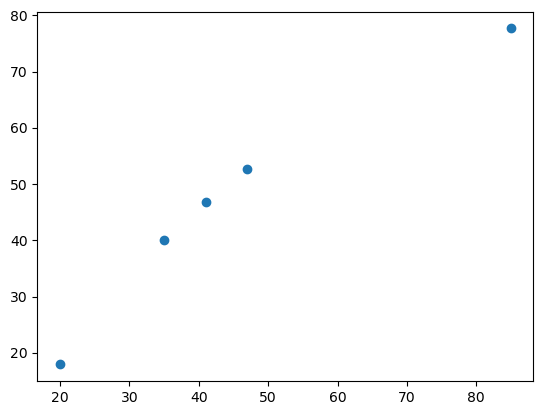

In [515]:
plt.scatter(y_test, y_pred)

### What will be predicted score if a student studies for 9.25 hrs/day? 

In [517]:
hours = np.array([9.25])
hours = hours.reshape(1, -1)
predictions = lm.predict(hours)
print(f"No. of Hours : {hours.flatten()[0]}, Predicted Score: {predictions.flatten()[0]}")

No. of Hours : 9.25, Predicted Score: 92.61212435942798
